In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# df = df_pre.sample(frac=1)
df_pre = pd.read_csv('data/wine.csv')
df = df_pre.sample(frac=0.5)  # 전체 데이터에서 샘플을 가져온다. 1= 100%, 0.7 = 70%

In [4]:
# 1: red wine, 0: white wine
# 1과 0을 구분하는 회귀, 바이너리 연산

In [5]:
dataset = df.values
print(dataset.dtype)
# 전체가 float 이므로 형변환 불필요

float64


In [6]:
X = dataset[:, :12]
Y = dataset[:, 12]

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 손실 함수 및 optimize 연걸
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :  # 같은 파일명이 존재하는지 확인
    os.mkdir(MODEL_DIR)   # 모델 생성
    

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # 체크포인트 생성, 무엇을 체크할 것인지 지정(mointor)

early_stopping = EarlyStopping(monitor='val_loss', patience=100) 
# 상태가 좋아지지 않으면 100번까지 참고, 그래도 loss 값이 좋아지지 않으면 자동으로 정지. 만약 값이 좋아지면 그 순간부터 다시 0부터 카운드 한다. 

# monitor=val_loss : 무엇을 체크할 것인지 지정. val_loss 를 관찰하라는 뜻
# verbose=1 : 중간 과정을 계속 출력하라
# save_best_only=True : 모델이 향상될 때만 저장하라 
# 

In [11]:
# model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[checkpointer,early_stopping])

# validation_split=0.2 : 20% 를 뗴어놓고, 80%만 훈련시킨 후, 나머지 20% 를 validate을 해주고, 그때마다 그 값을 나타내 보여달라
# verbose=0 : 출력 값을 보이지 마라
# print("Accuracy:  %.4f" % (model.evaluate(X, Y)))


Epoch 00001: val_loss improved from inf to 0.78239, saving model to ./model/01-0.7824.hdf5

Epoch 00002: val_loss improved from 0.78239 to 0.69160, saving model to ./model/02-0.6916.hdf5

Epoch 00003: val_loss improved from 0.69160 to 0.50391, saving model to ./model/03-0.5039.hdf5

Epoch 00004: val_loss improved from 0.50391 to 0.48676, saving model to ./model/04-0.4868.hdf5

Epoch 00005: val_loss improved from 0.48676 to 0.38270, saving model to ./model/05-0.3827.hdf5

Epoch 00006: val_loss improved from 0.38270 to 0.38249, saving model to ./model/06-0.3825.hdf5

Epoch 00007: val_loss improved from 0.38249 to 0.33495, saving model to ./model/07-0.3349.hdf5

Epoch 00008: val_loss improved from 0.33495 to 0.32274, saving model to ./model/08-0.3227.hdf5

Epoch 00009: val_loss improved from 0.32274 to 0.29794, saving model to ./model/09-0.2979.hdf5

Epoch 00010: val_loss improved from 0.29794 to 0.28895, saving model to ./model/10-0.2889.hdf5

Epoch 00011: val_loss improved from 0.28895

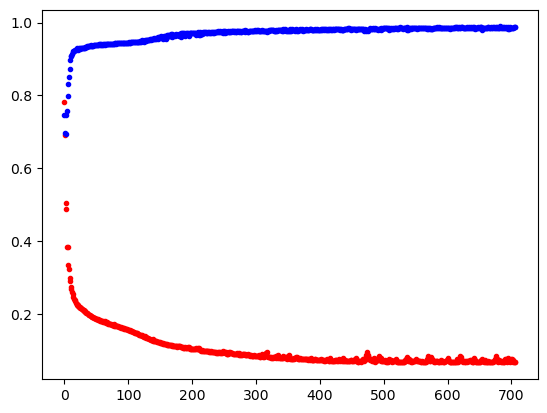

In [12]:
history = model.fit(X,Y, validation_split=0.33,
                    epochs=3500, batch_size=500, verbose=0, callbacks=[checkpointer,early_stopping])
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()